In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymutspec.annotation import filter_outlier_branches

In [102]:
import os
os.listdir('data')

['nemu_inputs',
 'Bloom_etal',
 'species.csv',
 'trees',
 'vir_linages.csv',
 'virus_taxid_host_gene.csv',
 'nemu',
 'cossim_nemu_bloom.csv',
 'ms12syn_all_virus.csv',
 'taxid_virus_type.csv',
 'viral_spectra_dataset.csv',
 'allmut_nemu.zip',
 'allmut_nemu.csv',
 '.gitignore',
 'virs_fit_metrics.csv',
 'virs_rnd_fit_metrics.csv',
 'aminoacid_eq_freq_all_virus.csv',
 'aminoacid_eq_freq_sars_cov2.csv',
 'losers_gainers.csv',
 'nucl_eq_freq_all_virus.csv',
 'aminoacid_freq_all_virus.csv',
 'df_taxid_ref_seq.csv',
 'nucl_4f_freq_all_virus.csv',
 'nucl_all_freq_all_virus.csv',
 'nucl_eq_freq_sars_cov2.csv',
 'mutation_summary_vir.csv',
 'nemu_results_qc.csv',
 'viral_taxid_info_be.csv']

In [103]:
mutations = pd.read_csv('data/allmut_nemu.csv')
spectra = pd.read_csv('data/viral_spectra_dataset.csv')#.query('df == "nemu"')
raw_spectra = pd.read_csv('data/ms12syn_all_virus.csv')
host_gene = pd.read_csv('data/virus_taxid_host_gene.csv')
vir_type = pd.read_csv('data/taxid_virus_type.csv', index_col=0)
linages = pd.read_csv('data/vir_linages.csv')
seq_cnt = pd.read_csv('data/nemu_inputs/seq_cnt.csv') # 3052310(11620),156,7587

# vir_type['taxid'] = vir_type['taxid'].astype(int)

In [104]:
mutations_filtered = []
for _, group in mutations.groupby('taxid'):
    filtered_group = filter_outlier_branches(group)
    mutations_filtered.append(filtered_group)
mutations_filtered = pd.concat(mutations_filtered, ignore_index=True)

In [105]:
raw_spectra.taxid.unique()

array([  10407,   10990,   11082,   11320, 1133363, 1157337,  118655,
         11983,   12092,   12110,   12162,   12637,  138948,  138950,
        138951,  162145, 1678143, 1933178,  198112,   28295,   28344,
       3052230, 3052493, 3052763,  351073,   38170,   40054,   54290,
         57482,  693997,  694014,   77763])

In [106]:
final_df = vir_type[vir_type.taxid.isin(raw_spectra.taxid.unique())]\
    .merge(linages, how='left')\
        .merge(seq_cnt, how='left', on='taxid')
final_df.head()

,taxid,species,host,gene,comment,Type,genus,family,order,class,phylum,kingdom,superkingdom,Nucleotide_Count,sequences,nucleotide_sites
0,38170,Avian orthoreovirus__38170,NaN,NaN,NaN,ds,Orthoreovirus__10882,Reoviridae__10880,Reovirales__2732541,Resentoviricetes__2732459,Duplornaviricota__2732405,Orthornavirae__2732396,Viruses__10239,4363.0,199.0,4011.0
1,1157337,Piscine orthoreovirus__1157337,NaN,NaN,NaN,ds,Orthoreovirus__10882,Reoviridae__10880,Reovirales__2732541,Resentoviricetes__2732459,Duplornaviricota__2732405,Orthornavirae__2732396,Viruses__10239,2478.0,79.0,4049.0
2,351073,Mammalian orthoreovirus__351073,NaN,NaN,NaN,ds,Orthoreovirus__10882,Reoviridae__10880,Reovirales__2732541,Resentoviricetes__2732459,Duplornaviricota__2732405,Orthornavirae__2732396,Viruses__10239,2366.0,161.0,3968.0
3,40054,Epizootic hemorrhagic disease virus__40054,NaN,NaN,NaN,ds,Orbivirus__10892,Reoviridae__10880,Reovirales__2732541,Resentoviricetes__2732459,Duplornaviricota__2732405,Orthornavirae__2732396,Viruses__10239,1773.0,NaN,NaN
4,10990,Rice black streaked dwarf virus__10990,Avena sativa,P1 protein,NaN,ds,Fijivirus__10988,Reoviridae__10880,Reovirales__2732541,Resentoviricetes__2732459,Duplornaviricota__2732405,Orthornavirae__2732396,Viruses__10239,1149.0,123.0,4395.0


In [107]:
final_df.shape

(32, 16)

In [108]:
# species names do not match taxids in some cases. Comment column store this info
final_df[final_df['species'].str.extract('.+__(.+)').astype(int)[0] != final_df['taxid']]

,taxid,species,host,gene,comment,Type,genus,family,order,class,phylum,kingdom,superkingdom,Nucleotide_Count,sequences,nucleotide_sites
9,3052493,Puumala orthohantavirus__1980486,Myodes glareolus,polymerase,oldTaxid:1980486,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0,6471.0
10,118655,Oropouche orthobunyavirus__1933309,Homo sapiens,RNA polymerase,OldTaxid:1933309,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472.0,6760.0
11,3052763,Rice stripe tenuivirus__12331,NaN,NaN,OldTaxid:12331,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1133363,Schmallenberg orthobunyavirus__2560743,Ovis aries,M polyprotein,OldTaxid:2560743,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,4221.0
28,54290,Pegivirus C__1985356,Homo sapiens,polyprotein,OldTaxid:1985356,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,8551.0


In [109]:
final_df['species'] = final_df['species'].str.replace('__.+', '', regex=True)

In [111]:
raw_spectra.query('taxid == 38170')

,Mut,ObsNum,ExpNum,MutSpec,MutSpec_q05,MutSpec_median,MutSpec_q95,taxid
300,A>C,135.4520,109.5220,0.044178,0.036202,0.044150,0.050484,38170
301,A>G,947.4610,161.8930,0.209052,0.201085,0.209172,0.216445,38170
302,A>T,68.9001,99.1596,0.024820,0.020546,0.024197,0.028673,38170
303,C>A,139.4010,189.7800,0.026238,0.021971,0.025504,0.029387,38170
304,C>G,22.6850,149.4360,0.005423,0.003582,0.005463,0.007094,38170
305,C>T,2410.3900,343.6310,0.250562,0.241901,0.251264,0.261431,38170
306,G>A,1082.6700,227.9790,0.169638,0.163871,0.170463,0.177319,38170
307,G>C,30.9136,126.3500,0.008740,0.006876,0.008467,0.010675,38170
308,G>T,144.2450,126.3500,0.040780,0.036734,0.040682,0.044598,38170
309,T>A,100.3270,307.7100,0.011647,0.010096,0.011788,0.013285,38170


In [112]:
def calc_tstv(spectrum):
    spectrum = spectrum.set_index('Mut')
    transitions = spectrum.loc[['A>G', 'G>A', 'C>T', 'T>C'], 'MutSpec'].sum()
    transversions = spectrum.loc[['A>C', 'C>A', 'A>T', 'T>A', 'C>G', 'G>C', 'G>T', 'T>G'], 'MutSpec'].sum()
    if transversions == 0:
        return np.nan
    return transitions / transversions

mut_data = pd.concat([raw_spectra.groupby('taxid').ObsNum.sum().rename('ObsNum'),
raw_spectra.groupby('taxid').apply(calc_tstv).rename('TsTv')], axis=1).reset_index()

final_df = final_df.merge(mut_data, how='left', on='taxid')

/tmp/ipykernel_7012/659498527.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  raw_spectra.groupby('taxid').apply(calc_tstv).rename('TsTv')], axis=1).reset_index()


<Axes: xlabel='nmut', ylabel='Count'>

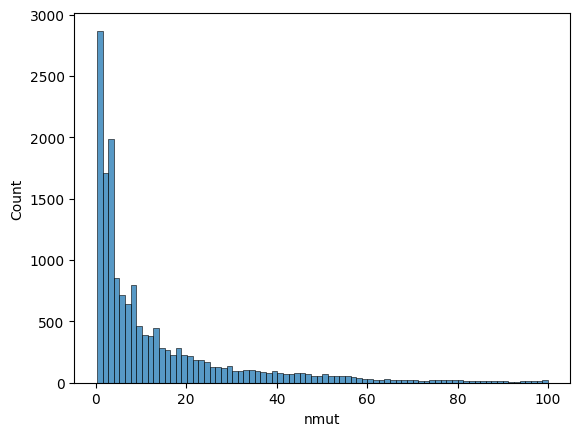

In [116]:
x = mutations_filtered.groupby(['taxid', 'AltNode']).ProbaMut.sum().rename('nmut').reset_index()
sns.histplot(data=x[x.nmut<100], x='nmut')

<Axes: xlabel='taxid', ylabel='nmut'>

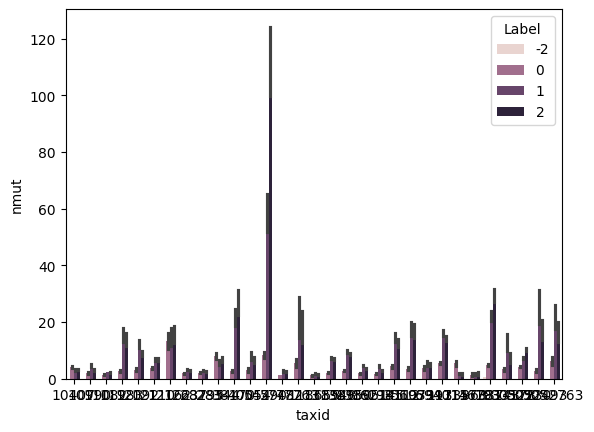

In [117]:
x = mutations_filtered.groupby(['taxid', 'AltNode', 'Label']).ProbaMut.sum().rename('nmut').reset_index()
sns.barplot(data=x, x='taxid', hue='Label', y='nmut')

In [118]:
nmut = mutations_filtered.groupby(['taxid', 'Label']).ProbaMut.sum().unstack().reset_index()
nmut['nsyn'] = nmut[1]+nmut[2]
nmut['n[syn+nonsyn]'] = nmut[0]+nmut[1]+nmut[2]
nmut.head()

Label,taxid,-2,0,1,2,nsyn,n[syn+nonsyn]
0,10407,NaN,2383.892893,1479.667486,1715.736464,3195.403950,5579.296843
1,10990,NaN,238.358078,751.610794,443.048654,1194.659448,1433.017526
2,11082,NaN,468.694983,1158.307262,970.429924,2128.737186,2597.432169
3,11983,NaN,337.475278,2428.890431,2201.663193,4630.553624,4968.028902
4,12092,NaN,755.872610,4609.999980,3074.808593,7684.808573,8440.681183


In [119]:
final_df = final_df.merge(nmut[['taxid', 'nsyn', 'n[syn+nonsyn]']], how='left', on='taxid')

final_df.to_csv('data/viral_taxid_info_be.csv', index=False)